* [Reshaping and pivot tables - pandas documentation](https://pandas.pydata.org/docs/user_guide/reshaping.html)

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

%matplotlib inline

In [13]:
df_first = pd.read_csv("/content/drive/MyDrive/data/전국신규민간아파트분양가격동향/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv", encoding="euc-kr")
df_first.shape

(17, 22)

In [14]:
df_first

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,8048,8038,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,8493,8627,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,10501,10397,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,8282,8527,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,6419,6631,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [15]:
df = pd.melt(df_first, id_vars=["지역"])
df.head()

,지역,variable,value
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [16]:
group = df.groupby(["지역", "variable"])["value"].sum()
group

지역  variable
강원  2013년12월    6230
    2014년10월    6631
    2014년11월    6365
    2014년12월    6365
    2014년1월     6230
                ... 
충북  2015년4월     6790
    2015년5월     6805
    2015년6월     6682
    2015년7월     6601
    2015년8월     6603
Name: value, Length: 357, dtype: int64

In [17]:
group.index

MultiIndex([('강원', '2013년12월'),
            ('강원', '2014년10월'),
            ('강원', '2014년11월'),
            ('강원', '2014년12월'),
            ('강원',  '2014년1월'),
            ('강원',  '2014년2월'),
            ('강원',  '2014년3월'),
            ('강원',  '2014년4월'),
            ('강원',  '2014년5월'),
            ('강원',  '2014년6월'),
            ...
            ('충북',  '2014년8월'),
            ('충북',  '2014년9월'),
            ('충북',  '2015년1월'),
            ('충북',  '2015년2월'),
            ('충북',  '2015년3월'),
            ('충북',  '2015년4월'),
            ('충북',  '2015년5월'),
            ('충북',  '2015년6월'),
            ('충북',  '2015년7월'),
            ('충북',  '2015년8월')],
           names=['지역', 'variable'], length=357)

In [18]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


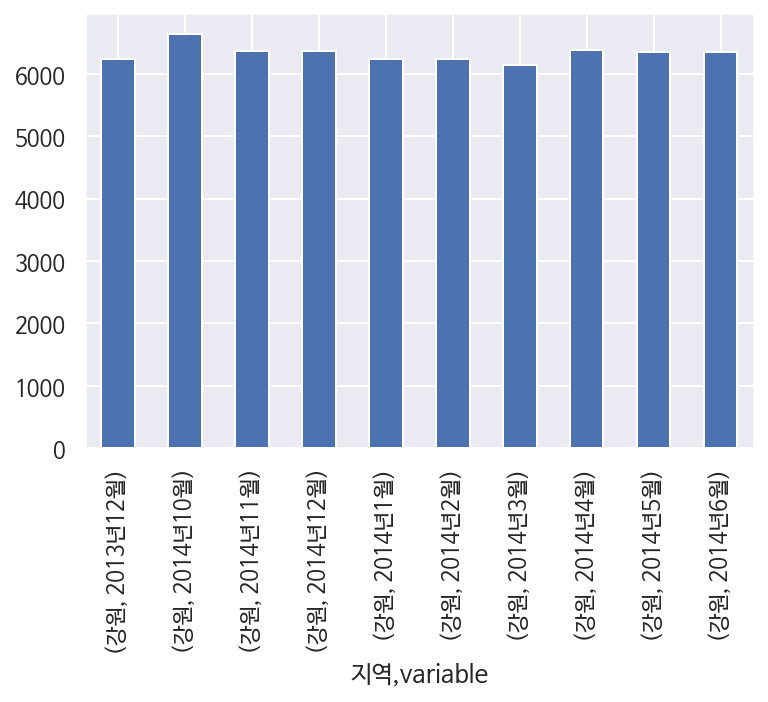

In [19]:
group[:10].plot.bar()

In [20]:
group_unstack = group.unstack()
group_unstack

variable,2013년12월,2014년10월,2014년11월,2014년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
지역,,,,,,,,,,,,,,,,,,,,,
강원,6230,6631,6365,6365,6230,6230,6141,6373,6350,6350,6268,6268,6419,6348,6350,6182,6924,6846,6986,7019,7008
경기,10855,10397,10356,10379,10855,10791,10784,10876,10646,10266,10124,10134,10501,10391,10355,10469,10684,10685,10573,10518,10573
경남,6473,6881,7125,7332,6485,6502,6610,6599,6610,6615,6613,6606,6767,7592,7588,7668,7683,7717,7715,7723,7665
경북,6168,6778,6881,6989,6168,6234,6317,6412,6409,6554,6556,6563,6577,6992,6953,6997,7006,6966,6887,7035,7037
광주,6098,7707,7752,7748,7326,7611,7346,7346,7523,7659,7612,7622,7802,7752,7756,7861,7914,7877,7881,8089,8231
대구,8080,8403,8439,8253,8080,8077,8101,8267,8274,8360,8360,8370,8449,8327,8416,8441,8446,8568,8542,8542,8795
대전,8321,8038,8067,8067,8321,8321,8341,8341,8341,8333,8333,8333,8048,8067,8067,8067,8145,8272,8079,8079,8079
부산,8111,9110,9208,9208,8111,9078,8965,9402,9501,9453,9457,9411,9258,9204,9235,9279,9327,9345,9515,9559,9581
서울,18189,19759,20242,20269,17925,17925,18016,18098,19446,18867,18742,19274,19404,20670,20670,19415,18842,18367,18374,18152,18443


In [21]:
group_unstack.T

지역,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
variable,,,,,,,,,,,,,,,,,
2013년12월,6230,10855,6473,6168,6098,8080,8321,8111,18189,7601,8090,10204,5678,6282,7674,6365,6589
2014년10월,6631,10397,6881,6778,7707,8403,8038,9110,19759,8527,8627,10016,5753,6581,7724,6831,6529
2014년11월,6365,10356,7125,6881,7752,8439,8067,9208,20242,8592,8891,10020,5768,6583,7724,6940,6724
2014년12월,6365,10379,7332,6989,7748,8253,8067,9208,20269,8560,8891,10020,5784,6583,7739,6989,6743
2014년1월,6230,10855,6485,6168,7326,8080,8321,8111,17925,7600,8090,10204,5678,6281,7900,6365,6589
2014년2월,6230,10791,6502,6234,7611,8077,8321,9078,17925,7532,8090,10408,5678,5946,7900,6379,6611
2014년3월,6141,10784,6610,6317,7346,8101,8341,8965,18016,7814,8153,10408,5696,5966,7900,6287,6625
2014년4월,6373,10876,6599,6412,7346,8267,8341,9402,18098,7908,8153,10000,5736,6277,7900,6552,6678
2014년5월,6350,10646,6610,6409,7523,8274,8341,9501,19446,7934,8153,9844,5656,6306,7900,6591,6598


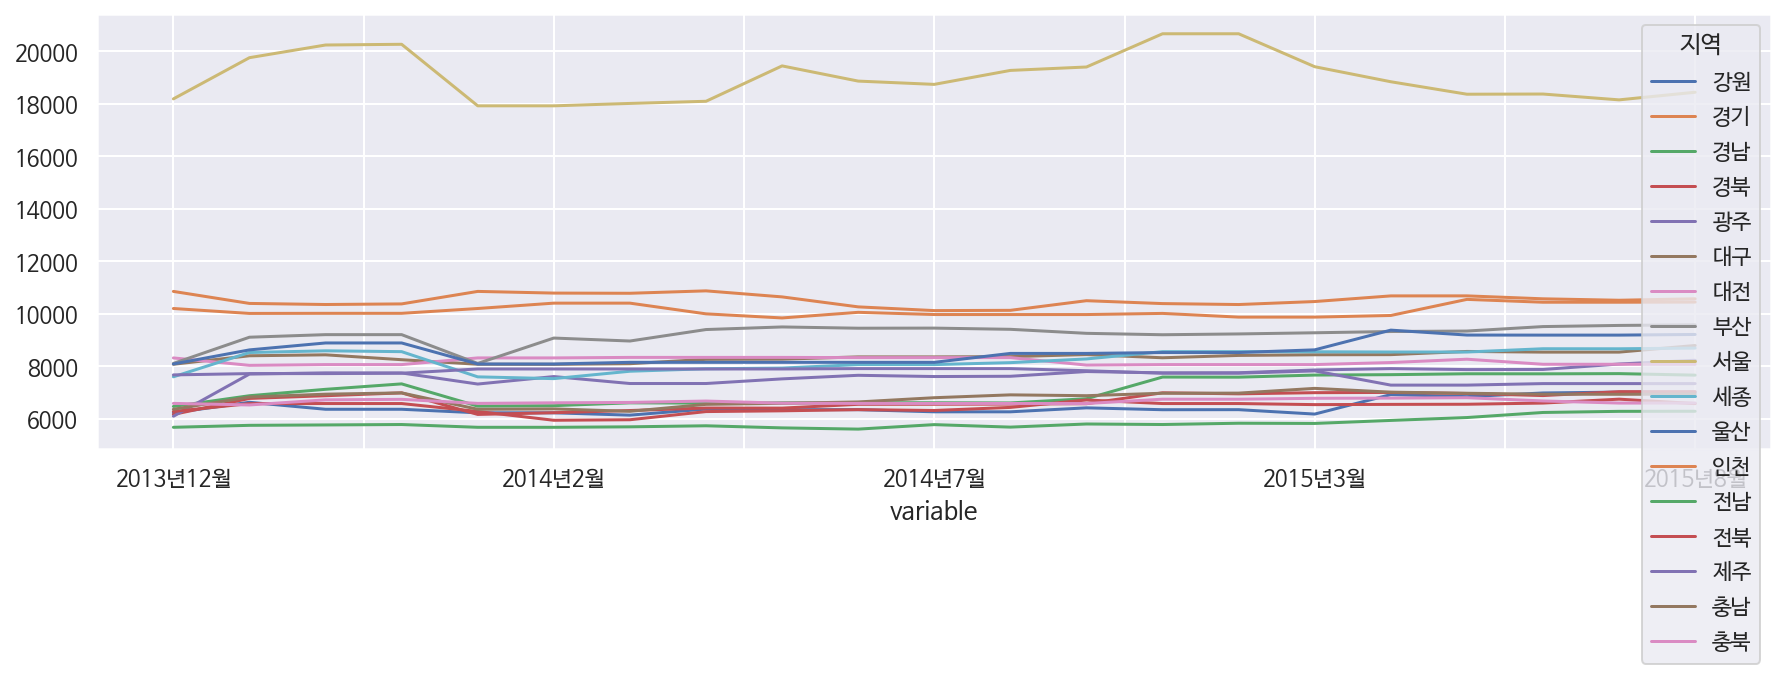

In [22]:
group_unstack.transpose().plot(figsize=(15, 4))

In [23]:
type(group)

pandas.core.series.Series

In [24]:
group.to_frame()

value
지역 variable       
강원 2013년12월   6230
   2014년10월   6631
   2014년11월   6365
   2014년12월   6365
   2014년1월    6230
...            ...
충북 2015년4월    6790
   2015년5월    6805
   2015년6월    6682
   2015년7월    6601
   2015년8월    6603

[357 rows x 1 columns]

In [25]:
pd.DataFrame(group)

value
지역 variable       
강원 2013년12월   6230
   2014년10월   6631
   2014년11월   6365
   2014년12월   6365
   2014년1월    6230
...            ...
충북 2015년4월    6790
   2015년5월    6805
   2015년6월    6682
   2015년7월    6601
   2015년8월    6603

[357 rows x 1 columns]

In [26]:
df_group = group.reset_index()
df_group

,지역,variable,value
0,강원,2013년12월,6230
1,강원,2014년10월,6631
2,강원,2014년11월,6365
3,강원,2014년12월,6365
4,강원,2014년1월,6230
...,...,...,...
352,충북,2015년4월,6790
353,충북,2015년5월,6805
354,충북,2015년6월,6682
355,충북,2015년7월,6601


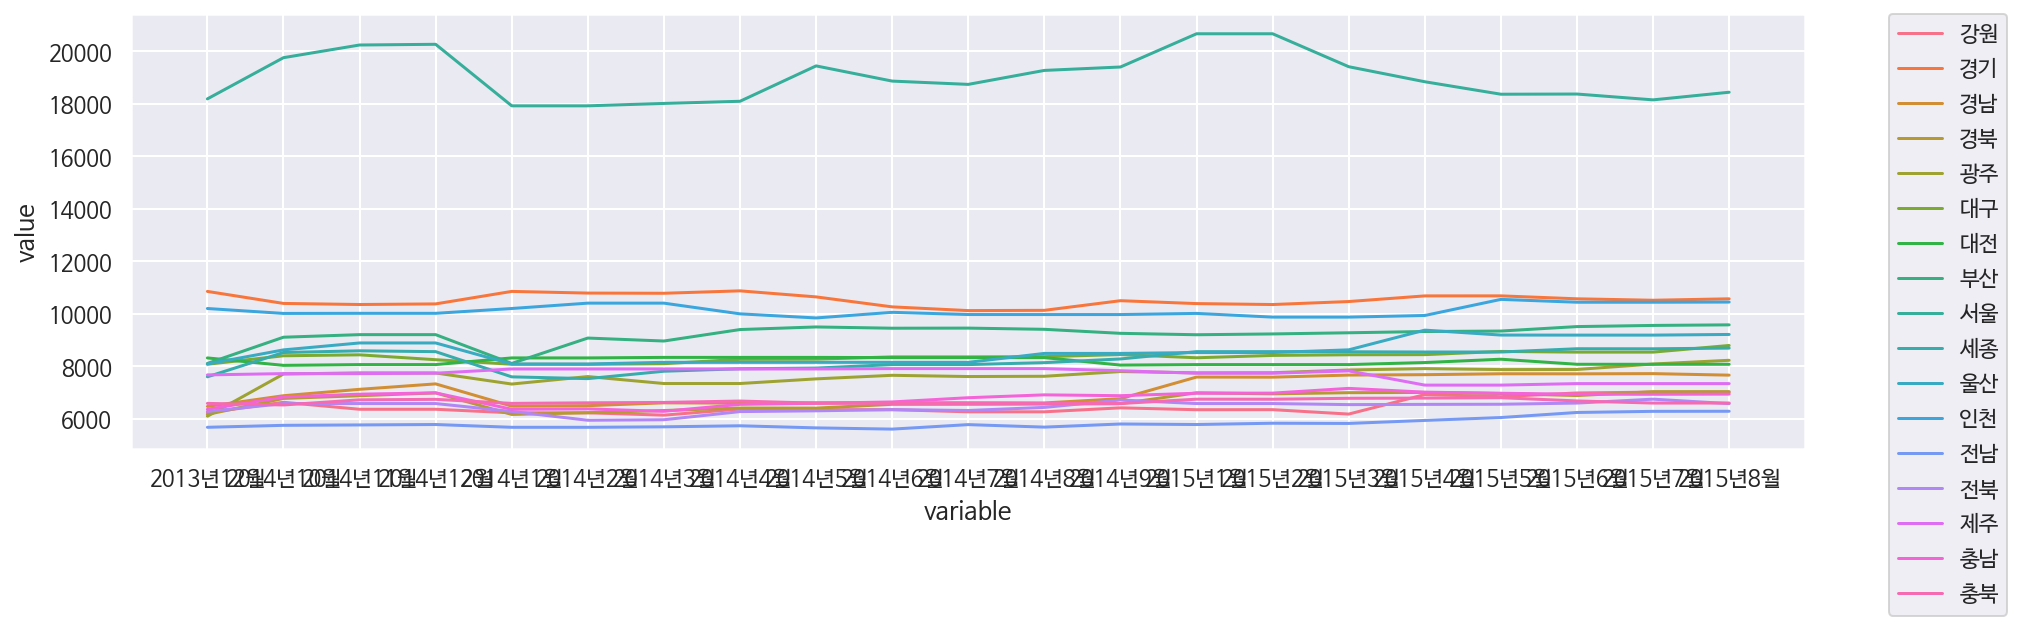

In [32]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_group, x="variable", y="value", hue="지역")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)